- Bruno Amorim — RM365279
- Gabriel Rizzo — RM366033  
- Mauricio Magnani — RM365929
- Vinicius Martins — RM365278
- Gerson Luiz - RM366284

## Estudo e predição de casos de AVC (stroke)

Link do dataset: https://www.kaggle.com/datasets/godfatherfigure/healthcare-dataset-stroke-data




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## Análise inicial dos dados

Vamos validar os dados nesse passo, verificando existencia de dados nulos, tratando e analisando a estrutura dos dados.

In [ ]:
df_original = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
# Verificando quantas linhas e colunas temos no dataset
df_original.shape

(5110, 12)

In [ ]:
# Validando duplicidade

df_original.duplicated().sum()

np.int64(0)

In [ ]:
# Verificando os tipos dos dados e a contagem de nulos.

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df_original.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df_original.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Podemos observar que temos algumas linhas com o campo bmi (body mass indicator) nulos. Vamos verificar qual seria a melhor forma de trata-los baseando nos dados existentes na base

In [ ]:
df_original.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Vemos que não existe uma diferença grande entre a média e a mediana. Podemos assumir um dos dois fatores para preencher os dados nulos. Conseguimos analisar também que não temos muitos valores de outliers nessa base na coluna de bmi, já que a média e a mediana estão proximas e não temos um valor muito alto de desvio padrão. Iremos analisar isso melhor nas próximas etapas.

In [ ]:
# Prenchendo os dados nulos com a média
bmi_mean = df_original.bmi.mean()
df_original.bmi = df_original['bmi'].fillna(bmi_mean)

In [ ]:
# Validando os dados nulos

df_original.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


Podemos analisar que temos uma média de idade fica em torno de 43 e a mediana de 45. Segundo pesquisas da World Stroke Organization, 16% dos AVCs acontecem em pessoas entre 15-49 anos e 62% acontecem em pessoas com menos de 72. Indicando que a nossa média de idade na base não será um problema, apesar de muitos acharem que é uma doença que acontece predominantemente em pessoas de mais idade.

Fonte:

https://nav.dasa.com.br/blog/avc-nao-e-doenca-de-idosos

https://www.dropbox.com/scl/fi/tiqrhvs06s58yamxa053x/World-Stroke-Organization-WSO-Global-Stroke-Fact-Sheet-2022.pdf?rlkey=pbndaqvaadzpij099dwe6psx5&e=1&dl=0

Nos outros dados, aparentemente temos valores bem distribuidos. Vamos abordar mais nos tópicos abaixo

# Estudando as colunas

In [ ]:
df_original.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#removendo o ID que sabemos que não faze sentido

df_original = df_original.drop(columns='id')

## age

Vemos que pelo boxplot conseguimos confirmar que a suposição de não termos outliers é verdade. A maior parte dos nossos dados estão distribuidos entre 21 até 60, que representa a faixa de idade apresentado no estudo da World Stroke Organization onde a maior parte dos AVCs ocorrem nessa faixa de idade.

<Axes: ylabel='age'>

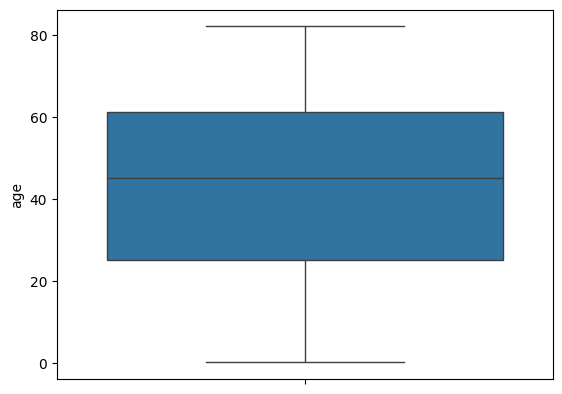

In [ ]:
sns.boxplot(df_original.age)

## avg_glucose_level

Nessa coluna temos dados bastante concentrados nos **valores** de 77.245000 até 114.090000.

Podemos verificar que há vários dados de outliers. Temos muitos individuos com glicose alta, acima de 150 até ~260.

Segundo a ABESO (Associação Brasileira para o estudo da obesidade e síndrome metabólica) a faixa ideal de glicemia é de 70 a 99 em jejum

https://abeso.org.br/qual-o-valor-normal-da-glicemia-saiba-o-que-e-e-como-medir-corretamente/

<Axes: ylabel='avg_glucose_level'>

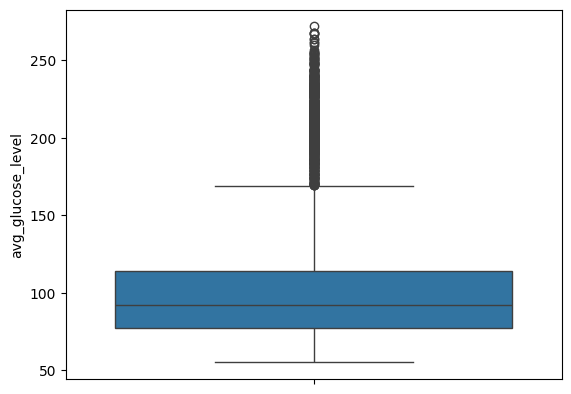

In [ ]:
sns.boxplot(df_original.avg_glucose_level)

## bmi

Conseguimos verificar que temos uma quantidade alte de individuos outliers

Podemos teorizar que esses outliers representam individos enquadrados em obesidade. Já que há uma discrepancia muito grande dos limiares saudáveis (18.5-24.9)

Temos alguns dados que podem realmente indicar uma obesidade muito extrema ou dados errados (valores muito próximos a 100)

Mas entre os quartis, não podemos afirmar que são individuos que não são saudaveis, se passam do limiar de 24.9 mas estão próximos desse valor. O bmi considera somente o peso e a altura, então não se leva o percentual de massa muscular e o percentual de gordura em consideração. Então, individuos com um incidencia maior de musculos, podem estar acima do bmi ideal mas não indicam que não sejam saudáveis.

Podemos ver um representante de um outlier abaixo de 20 de bmi, que é um dado factível, já que o intervalo saudável começa de 18.5

Fontes:

National Heart, Lung, and Blood Home
- https://www.nhlbi.nih.gov/sites/default/files/media/docs/bmi_tbl.pdf
- https://www.nhlbi.nih.gov/calculate-your-bmi

<Axes: ylabel='bmi'>

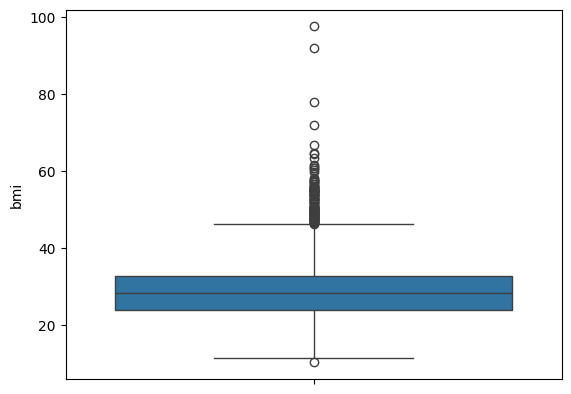

In [ ]:
sns.boxplot(df_original.bmi)

Os outros campos, são categóricas ou binárias, então não faz sentido fazer um boxplot da coluna.

## gender

In [ ]:
set(df_original.gender)

{'Female', 'Male', 'Other'}

## work_type

Representa o tipo de emprego de cada individuo. Temos também o caso do individuo ser uma criança

Também representa aqueles que nunca trabalharam

In [ ]:
set(df_original.work_type)

{'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'}

## ever_married

Representa se a pessoa se casou ou não. É um dado categórico, representado por sim ou não. Acaba sendo uma coluna que pode ser representada por valores binários.

In [ ]:
set(df_original.ever_married)

{'No', 'Yes'}

## Residence_type

Represente a localidade da pessoa. É uma coluna de texto, que pode ser tratada posteriormente para ser inserida no modelo.

In [ ]:
set(df_original.Residence_type)

{'Rural', 'Urban'}

## smoking_status

Representa os dados se o individuo já fumou e a incidencia. É um campo categórico com 4 classes

In [ ]:
set(df_original.smoking_status)

{'Unknown', 'formerly smoked', 'never smoked', 'smokes'}

# Análise dos dados

Vamos entender melhor a representação dos dados, distribuição e como elas se relacionam

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

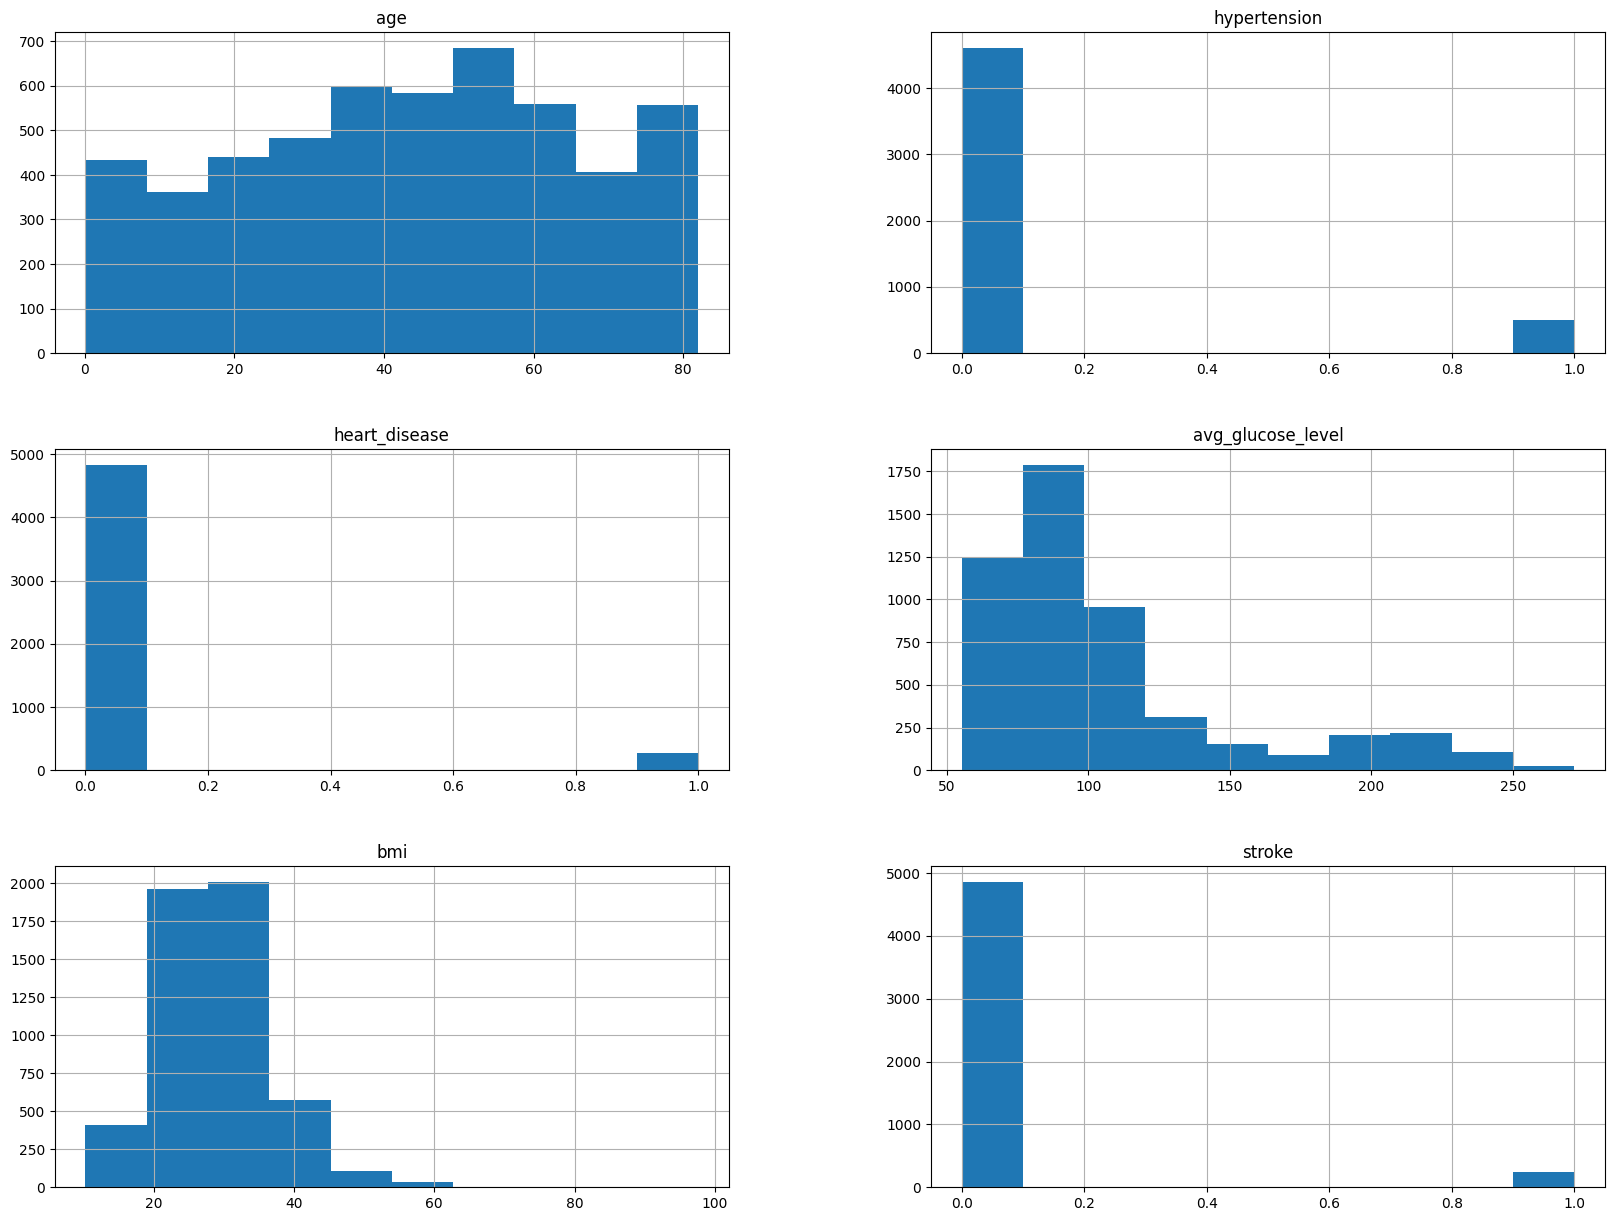

In [ ]:
# plotando o histograma para verificar a distribuição dos dados

df_original.hist(figsize=(20,15))

Não temos nenhum dado que apresenta uma distribuição normal. Podemos ver que na base de dados há uma incidencia muito maior de individuos que não tiveram AVC. Vamos analisar essa diferença

Text(1, 250, '249')

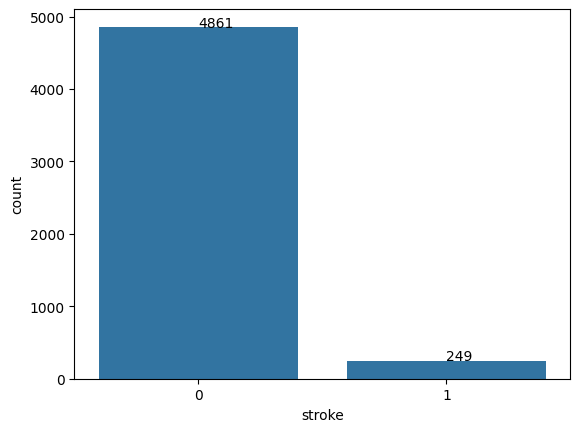

In [ ]:
count_values_stroke = df_original.stroke.value_counts()

sns.barplot(count_values_stroke)

plt.text(0, count_values_stroke[0] + 1, count_values_stroke[0])
plt.text(1, count_values_stroke[1] + 1, count_values_stroke[1])

Vemos que há uma discrepância grande de incidencia de AVC. Temos poucos casos que indicam a ocorrência de AVC, provavelmente teremos que fazer alguma forma de oversampling, caso não tenhamos resultados satisfatórios no treinamento do modelo.

<Axes: xlabel='age', ylabel='Count'>

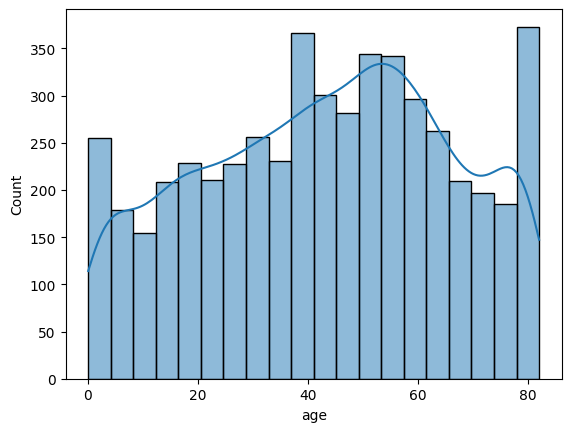

In [ ]:
# Vamos analisar melhor o gráfico de idade

sns.histplot(df_original.age, kde=True)

Vamos analisar como está distribuido os individuos do dataframe, de acordo com o genero e idade.

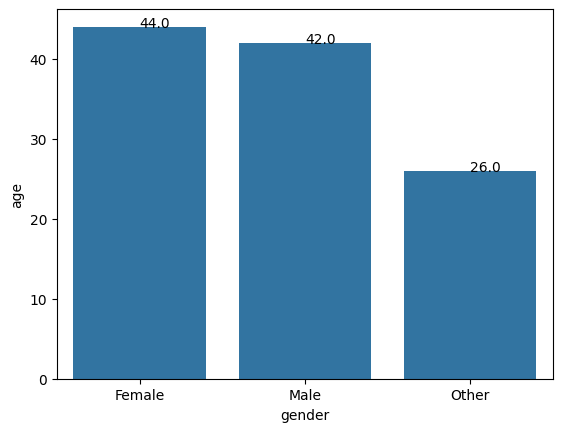

In [ ]:
# Temos a incidencia de pessoas mais velhas entre homens ou mulheres?

mean_age_by_gender = df_original.groupby('gender')['age'].mean().round()

sns.barplot(mean_age_by_gender)

for index, value in enumerate(mean_age_by_gender):
    plt.text(index, value, value)

Conseguimos verificar que temos mais individos mulheres que homem ou outros.

O AVC não se relaciona somente com a idade, mas pode ser um fator indicativo.

**Segundo a fonte World Stroke Organization, há uma incidencia maior de AVCs em mulheres do que homens. Será que isso ocorre nesse dataset?**

/tmp/ipython-input-2012608677.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, stroke_gender_counts[i] + 1, stroke_gender_counts[i])


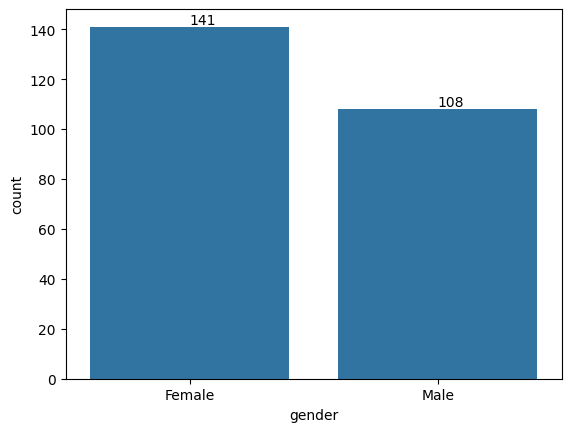

In [ ]:
df_stroke_only = df_original[df_original.stroke == 1]

stroke_gender_counts = df_stroke_only.gender.value_counts()

sns.barplot(stroke_gender_counts)

for i, values in enumerate(stroke_gender_counts):
    plt.text(i, stroke_gender_counts[i] + 1, stroke_gender_counts[i])

Conseguimos observar que temos mais incidencia de casos de AVC em mulheres, como dito nas pesquisas.

**Dentre as pessoas que estão na pesquisa, como se encontra a distribuição residencial no dataset?**

<Axes: xlabel='Residence_type', ylabel='count'>

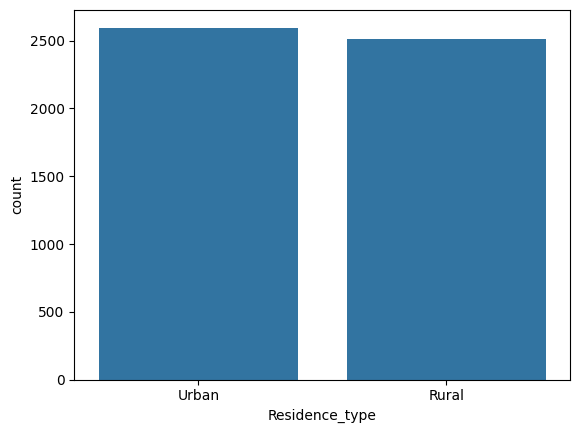

In [ ]:
residence_type = df_original.Residence_type.value_counts()

sns.barplot(residence_type)

**Dentre os casos de AVC, temos uma relação maior em perimetros urbanos do que em rurais?**

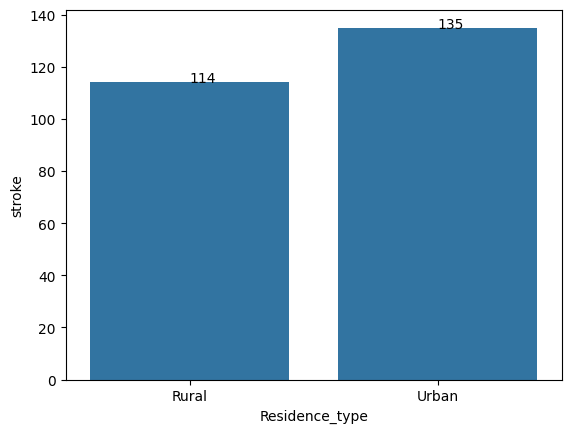

In [ ]:
group_by_residence_type = df_stroke_only.groupby('Residence_type')['stroke'].count()

sns.barplot(group_by_residence_type)

for i, value in enumerate(group_by_residence_type):
    plt.text(i, value, value)

Vemos que a maior parte dos casos acontecem em perimetros urbanos. Podendo indicar alguma relação com o estilo de vida e stress mais predominante dentro de ambientes urbanos.

**Individuos com uma média de glicemia maior tentem a ter um bmi maior? E como isso se relaciona com casos de AVC**

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

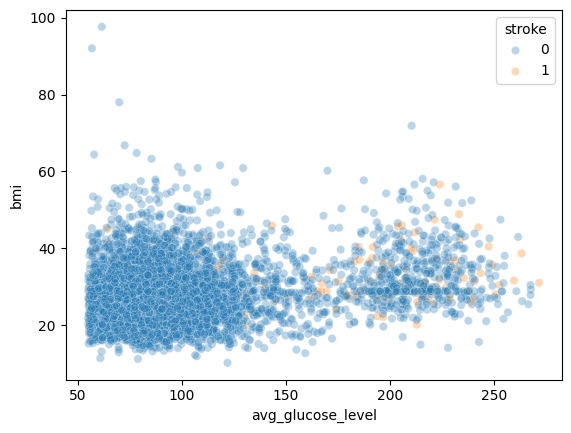

In [ ]:
sns.scatterplot(df_original, x='avg_glucose_level', y='bmi', hue='stroke', alpha=0.3)

Segundo os dados, não temos uma relação direta entre o bmi e o a média de glicose dos individuos. Como dito acima na análise do boxplot do bmi, vemos que ter um indice mais alto ou mais baixo, não indica necessariamente algum problema da saúde ou incidência de caso de AVC.

Porém, conseguimos ver claramente que o nível médio de glicose parece ser um fator relevante para AVCs.

Vemos que acima de 150 de média de glicose, há uma ocorrência muito maior de casos de AVC do que quando temos registros abaixo desse patamar

**Como o dado de fumante se relaciona com a glicose e o bmi?**

Text(0, 0.5, 'BMI (IMC)')

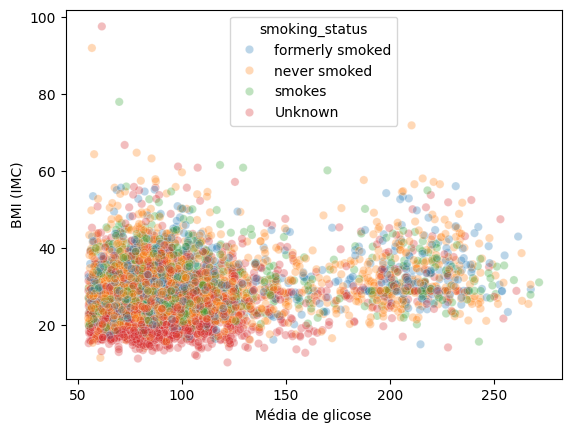

In [ ]:
sns.scatterplot(df_original, x='avg_glucose_level', y='bmi', hue='smoking_status', alpha=0.3)

plt.xlabel('Média de glicose')
plt.ylabel('BMI (IMC)')

Não conseguimos verificar nenhuma relação entre esses 3 valores. Aparentemente não temos uma relação de fumar com a taxa de bmi ser alta ou a glicose. Eles se encontram bem espalhados

**Como o dado de bmi e stroke (AVC) se relacionam com quem fuma?**

Text(0, 0.5, 'AVC')

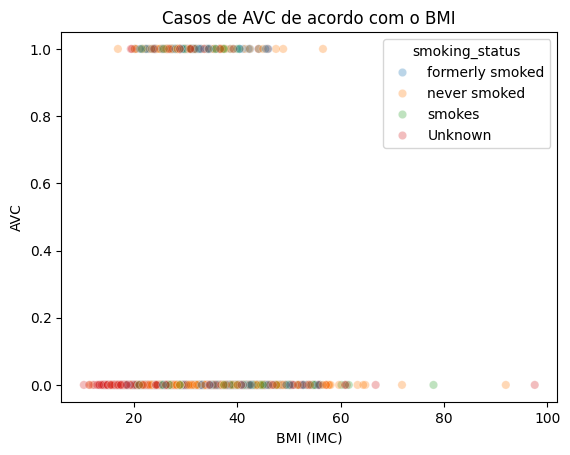

In [ ]:
sns.scatterplot(df_original, x='bmi', y='stroke', hue='smoking_status', alpha=0.3)

plt.title('Casos de AVC de acordo com o BMI')
plt.xlabel('BMI (IMC)')
plt.ylabel('AVC')

In [ ]:
px.violin(df_original, x='smoking_status', y='bmi', color='stroke', box=True, points='all')

Vemos que talvez tenha uma relação entre ser fumante e o AVC. Porém, temos uma questão onde temos uma distinção entre fumantes e ex fumantes, porém, os efeitos de já ter fumado podem ter afetado a incidencia da doença.

**Vamos criar uma nova classe "smoked" em um novo dataframe e plotar o gráfico de violino novamente**

In [ ]:
df_new_smoked_col = df_original.copy()

df_new_smoked_col['smoking_status'] = df_new_smoked_col['smoking_status'].replace(
    {'formerly smoked': 'smoked', 'smokes': 'smoked'}
)

In [ ]:
px.violin(df_new_smoked_col, x='smoking_status', y='bmi', color='stroke', box=True, points='all')

Text(0, 0.5, 'Quantidade')

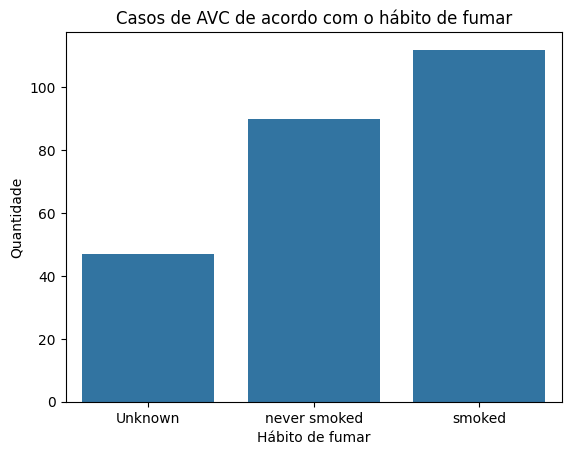

In [ ]:
grouped_by_smoke_status = df_new_smoked_col.groupby('smoking_status')['stroke'].sum()

sns.barplot(grouped_by_smoke_status)

plt.title('Casos de AVC de acordo com o hábito de fumar')
plt.xlabel('Hábito de fumar')
plt.ylabel('Quantidade')

Vemos que temos mais pessoas que tiveram AVC fumando do que não fumantes.

Um ponto a ser observado é que temos uma quantidade relevante de dados desconhecidos. Eles poderiam corroborar para alguma das duas classes.

Segundo estudos, podemos verificar que há relação entre hábito de fumar com a ocorrência de AVC.

**Como estão distribuidos os tipos de trabalho no dataset?**

/tmp/ipython-input-2527125573.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Text(0, 0.5, 'Quantidade')

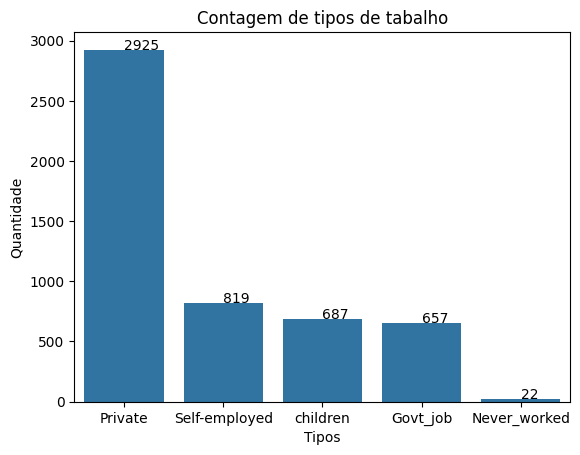

In [ ]:
work_type_grouped = df_original.work_type.value_counts()

sns.barplot(work_type_grouped)

for i, values in enumerate(work_type_grouped):
    plt.text(i, work_type_grouped[i] + 1, work_type_grouped[i])

plt.title('Contagem de tipos de tabalho')
plt.xlabel('Tipos')
plt.ylabel('Quantidade')

**Crianças tem menos incidencia de casos de AVC do que adultos?
E qual dos tipos de trabalho temos a maior ocorrência de casos de AVC?**

Text(0, 0.5, 'Casos de AVC')

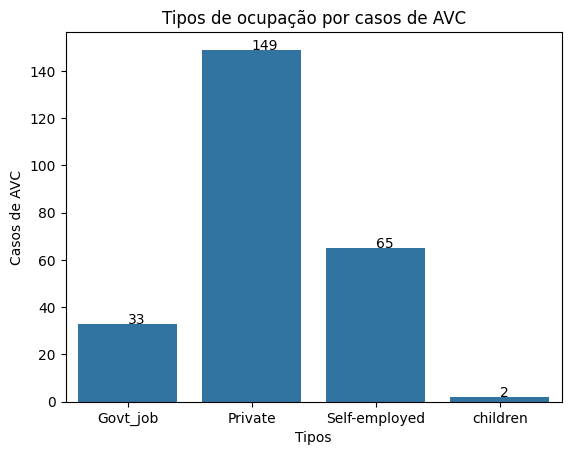

In [ ]:
stroke_cases_by_work_type = df_stroke_only.groupby('work_type')['stroke'].sum()

sns.barplot(stroke_cases_by_work_type)

for i, value in enumerate(stroke_cases_by_work_type):
    plt.text(i, value, value)

plt.title('Tipos de ocupação por casos de AVC')
plt.xlabel('Tipos')
plt.ylabel('Casos de AVC')

Vemos que há uma ocorrência maior de casos no setor privado no geral (Private e Self-employed). Sendo o maior trabalhando para uma empresa privada, não com seu próprio negócio

Vemos que no caso das crianças, temos pouca incidência, mostrando que realmente é algo bem atípico

**Proporcionalmente, a classe Private se mantém com a maior ocorrência?**

Text(0.5, 0, 'Tipo de Trabalho')

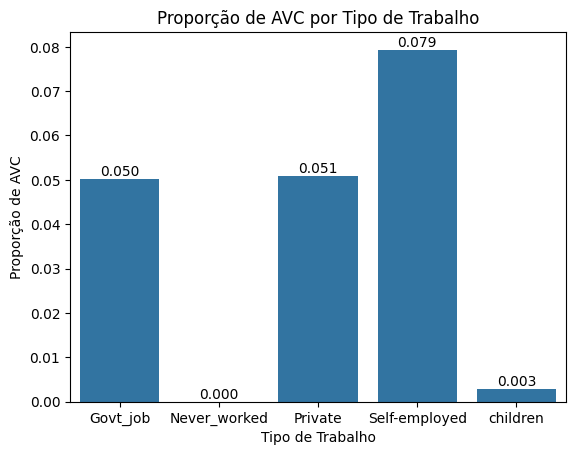

In [ ]:
# Calcular a proporção de stroke para cada work_type
stroke_proportion_by_work_type = df_original.groupby('work_type')['stroke'].mean()

# Criar o gráfico de barras com as proporções
sns.barplot(x=stroke_proportion_by_work_type.index, y=stroke_proportion_by_work_type.values)

# Adicionar os valores nas barras
for i, value in enumerate(stroke_proportion_by_work_type):
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')

plt.title('Proporção de AVC por Tipo de Trabalho')
plt.ylabel('Proporção de AVC')
plt.xlabel('Tipo de Trabalho')

Vemos que proporcionalmente, a classe que contém a maior quantidade de casos de AVC são aqueles que são empreendedores (self employed). E vemos também que nesse dataset não há nenhuma incidencia de avc em pessoas que não trabalham.

Talvez isso mostre que o stress do trabalho e sua rotina contribuam bastante para a incidencia de casos de AVC.

**Há alguma relação entre casamento e casos de AVC?**

/tmp/ipython-input-3314159653.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



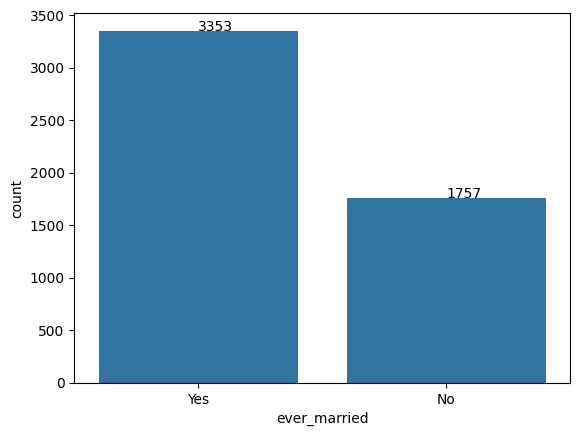

In [ ]:
ever_married_count = df_original.ever_married.value_counts()

sns.barplot(ever_married_count)

for i, values in enumerate(ever_married_count):
    plt.text(i, ever_married_count[i] + 1, ever_married_count[i])

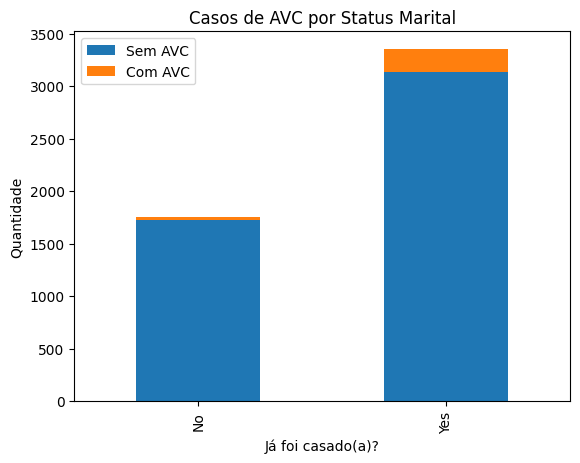

In [ ]:
# Tabela de contingência
marriage_stroke_table = pd.crosstab(df_original['ever_married'], df_original['stroke'])

marriage_stroke_table.plot(kind='bar', stacked=True)
plt.title('Casos de AVC por Status Marital')
plt.xlabel('Já foi casado(a)?')
plt.ylabel('Quantidade')
plt.legend(['Sem AVC', 'Com AVC'])

Por esse gráfico, não conseguimos afirmar que há uma relação. Nenhum estudo corrobora essa tese.

Como temos uma base com quase o dobro de pessoas que já se casaram, não podemos afirmar que isso é uma tendência

**Será que ter doença cardiaca influencia na ocorrência de AVC?**

Text(0, 0.5, 'Quantidade')

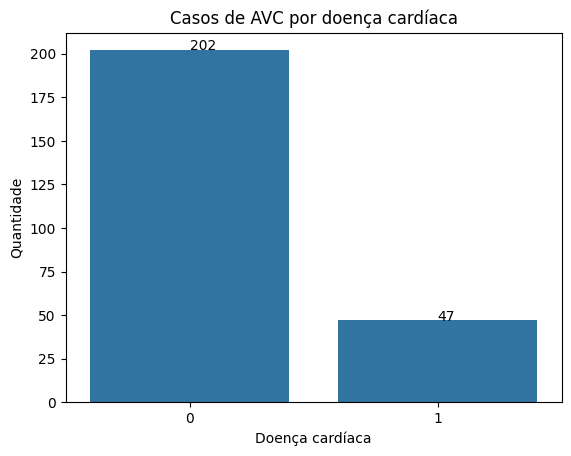

In [ ]:
people_with_stroke = df_original[df_original.stroke == 1]
group_by_heart_disease = people_with_stroke.groupby('heart_disease')['stroke'].count()

sns.barplot(group_by_heart_disease)

for i, value in enumerate(group_by_heart_disease):
    plt.text(i, value, value)

plt.title('Casos de AVC por doença cardíaca')
plt.xlabel('Doença cardíaca')
plt.ylabel('Quantidade')

Podemos observar no gráfico acima que uma parte representativa das pessoas que tiveram AVC, também tiveram doenças cardíacas (aproximadamente 19%).

Segundo estudos, é sabido que doenças do coração podem contribuir com a ocorrência do AVC. Porém, nem todas as doenças necessariamente vão contribuir com ter ou não um caso de acidente vascular cerebral.

"O estudo de Framingham relatou que a incidência de acidente vascular cerebral mais que dobrou na presença de doença cardíaca coronária, mais que triplicou com hipertensão, aumentou quatro vezes com insuficiência cardíaca e aumentou cinco vezes com fibrilação atrial"

Fonte: https://pmc.ncbi.nlm.nih.gov/articles/PMC5553569/

**A incidencia de hipertenção favorece o acontecimento do AVC?**

Text(0, 0.5, 'Quantidade')

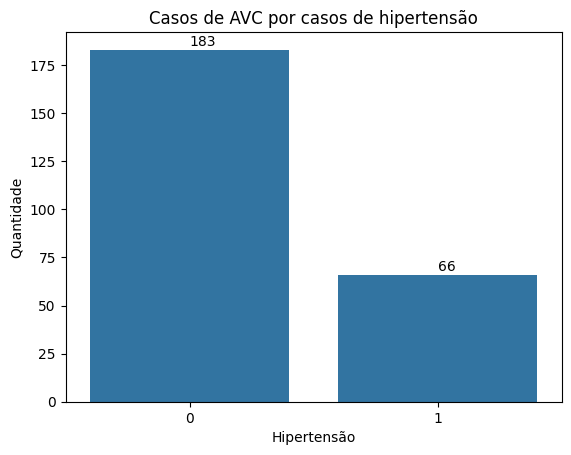

In [ ]:
grouped_by_hypertension = people_with_stroke.groupby('hypertension')['stroke'].count()

sns.barplot(grouped_by_hypertension)

for i, value in enumerate(grouped_by_hypertension):
    plt.text(i, value + 2, value)

plt.title('Casos de AVC por casos de hipertensão')
plt.xlabel('Hipertensão')
plt.ylabel('Quantidade')

Conseguimos verificar que em aproximadamente 26% dos casos de AVC, houve a presença de hipertensão. Corroborando com a fonte citada acima, onde indica que há um influencia entre as duas doenças.

**Qual faixas etárias tem mais ocorrência de acidente vascular cerebral?**

In [ ]:
# Nesse dataset a maior idade que temos é 82 anos, segundo o describe feito no inicio do documento

df_original['faixa_etaria'] = pd.cut(
    df_original['age'],
    bins=[0, 18, 38, 58, 78, 100],
    labels=['0-18', '19-38', '39-58', '59-78', '79+']
)

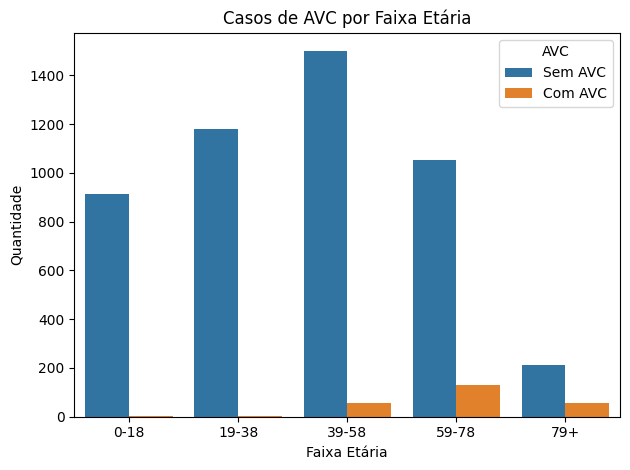

In [ ]:
sns.countplot(data=df_original, x='faixa_etaria', hue='stroke')
plt.title('Casos de AVC por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.legend(title='AVC', labels=['Sem AVC', 'Com AVC'])
plt.tight_layout()
plt.show()

/tmp/ipython-input-1729951919.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Text(0.5, 0, 'Faixa etária')

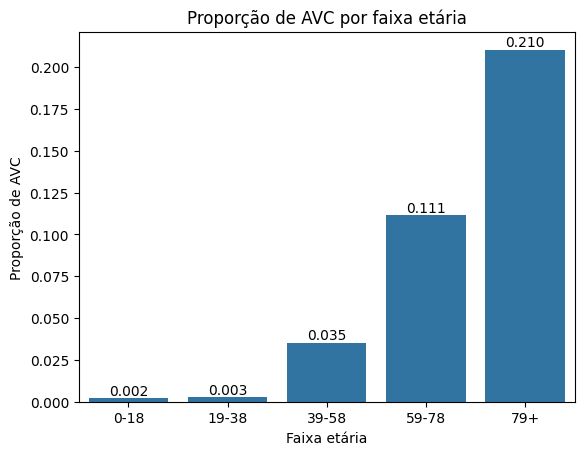

In [ ]:
# Calcular a proporção de stroke para cada work_type
stroke_by_age_bin = df_original.groupby('faixa_etaria')['stroke'].mean()

# Criar o gráfico de barras com as proporções
sns.barplot(x=stroke_by_age_bin.index, y=stroke_by_age_bin.values)

# Adicionar os valores nas barras
for i, value in enumerate(stroke_by_age_bin):
    plt.text(i, value, f'{value:.3f}', ha='center', va='bottom')

plt.title('Proporção de AVC por faixa etária')
plt.ylabel('Proporção de AVC')
plt.xlabel('Faixa etária')

Vemos que em dados absolutos, temos mais casos de AVC na faixa dos 59-78 anos. Porém, proporcionalmente, há mais casos de AVC na faixa acima de 79 anos.

Com isso, podemos analisar que no dataset os casos de AVC começam a ficar mais comuns a partir dos 39 anos. Podemos verificar que em indivíduos mais novos tem pouquissima chance de ter casos de AVC.

# Analise de correlação

Nosso objetivo é verificar quais as variáveis que influenciam na incidencia do AVC.

Verificamos algumas hipóteses de correlação baseado em dados e artigos, na etapa de análise exploratório. Agora iremos validar se os estudos se refletem realmente na correlação com a nossa variável target (stroke).

Algumas das colunas que temos como hipótese são:

avg_glucose_level, smoke_status, age, hypertension, heart_disease, work_type, Residence_type

## Tratamento de dados com Pipeline

In [ ]:
# Para conseguir correlacionar as colunas categóricas, precisamos transforma-las em colunas numéricas.

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


hot_encoder = OneHotEncoder(sparse_output=False, dtype='float64')
label_encoder = LabelEncoder()


# transformar o type1 e manter os dados como float usando simpleImputer (nao temos mais dados nulos, entao nao fará a substituição)
pipeline_categorical_to_number = ColumnTransformer(transformers=[
    ('imputer', SimpleImputer(), df_original.select_dtypes('float64').keys()),
    ('int_imputer', SimpleImputer(), df_original.select_dtypes('int64').keys()),
    ('encoded', hot_encoder, ['gender', 'work_type', 'Residence_type', 'smoking_status']),
], verbose_feature_names_out=False)

result = pipeline_categorical_to_number.fit_transform(df_original)

encoded_type_df = pd.DataFrame(result, columns=pipeline_categorical_to_number.get_feature_names_out())

In [ ]:
encoded_type_df['ever_married'] = label_encoder.fit_transform(df_original['ever_married'])

encoded_type_df.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married
0,67.0,228.69,36.600000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,61.0,202.21,28.893237,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,80.0,105.92,32.500000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,49.0,171.23,34.400000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,79.0,174.12,24.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
encoded_type_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   hypertension                    5110 non-null   float64
 4   heart_disease                   5110 non-null   float64
 5   stroke                          5110 non-null   float64
 6   gender_Female                   5110 non-null   float64
 7   gender_Male                     5110 non-null   float64
 8   gender_Other                    5110 non-null   float64
 9   work_type_Govt_job              5110 non-null   float64
 10  work_type_Never_worked          5110 non-null   float64
 11  work_type_Private               5110 non-null   float64
 12  work_type_Self-employed         51

## Matriz de correlação

<Axes: >

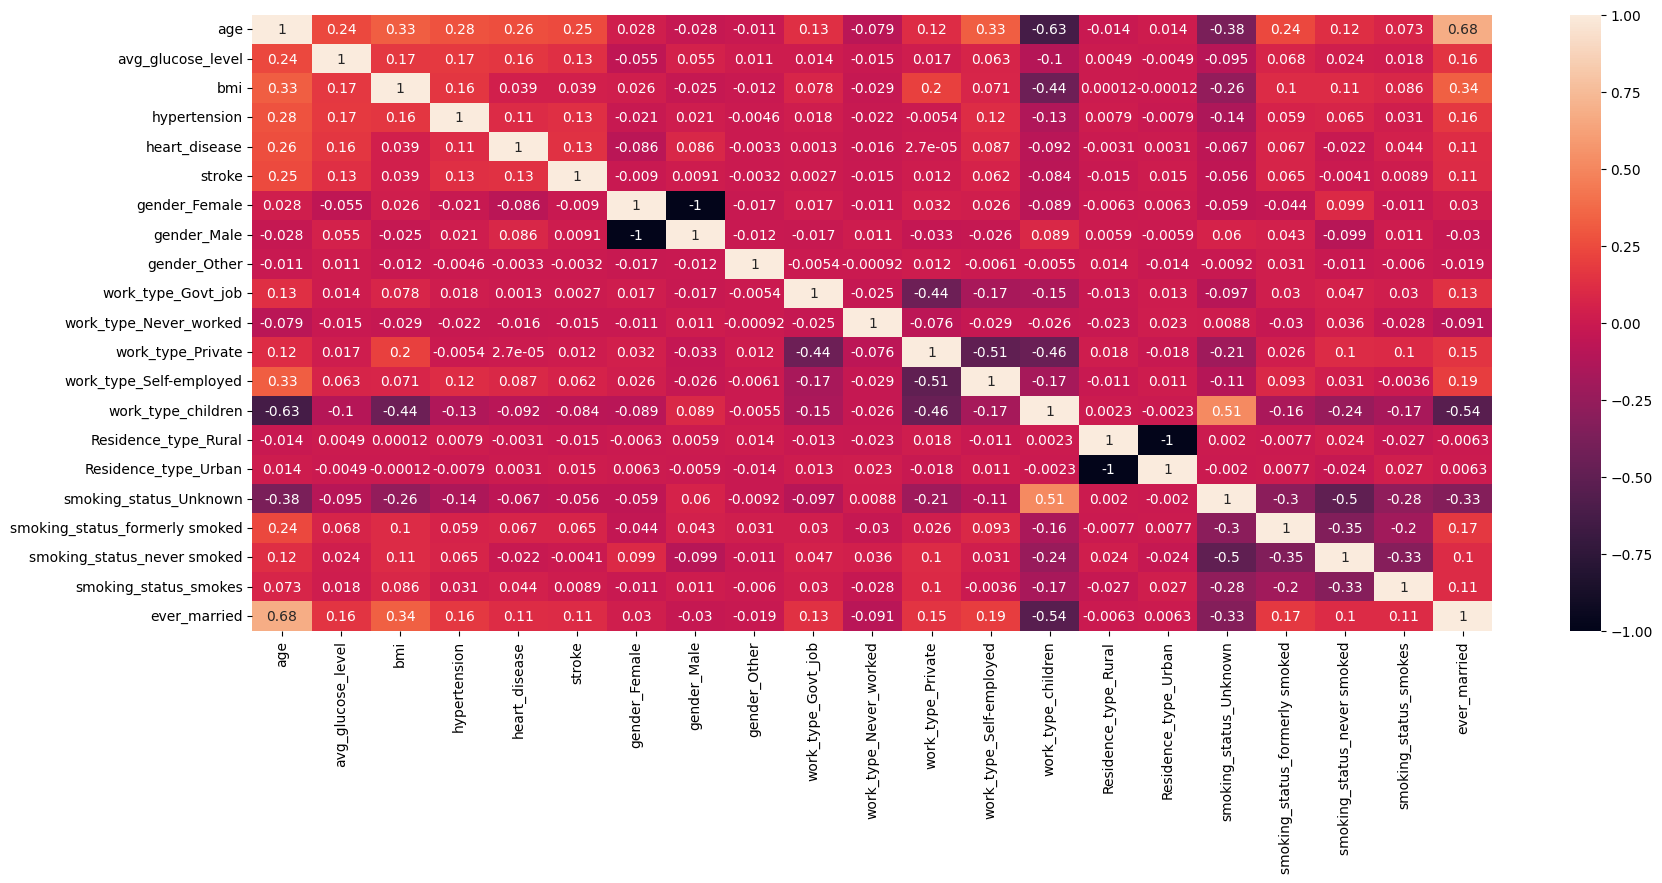

In [ ]:
corr = encoded_type_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)

<Axes: >

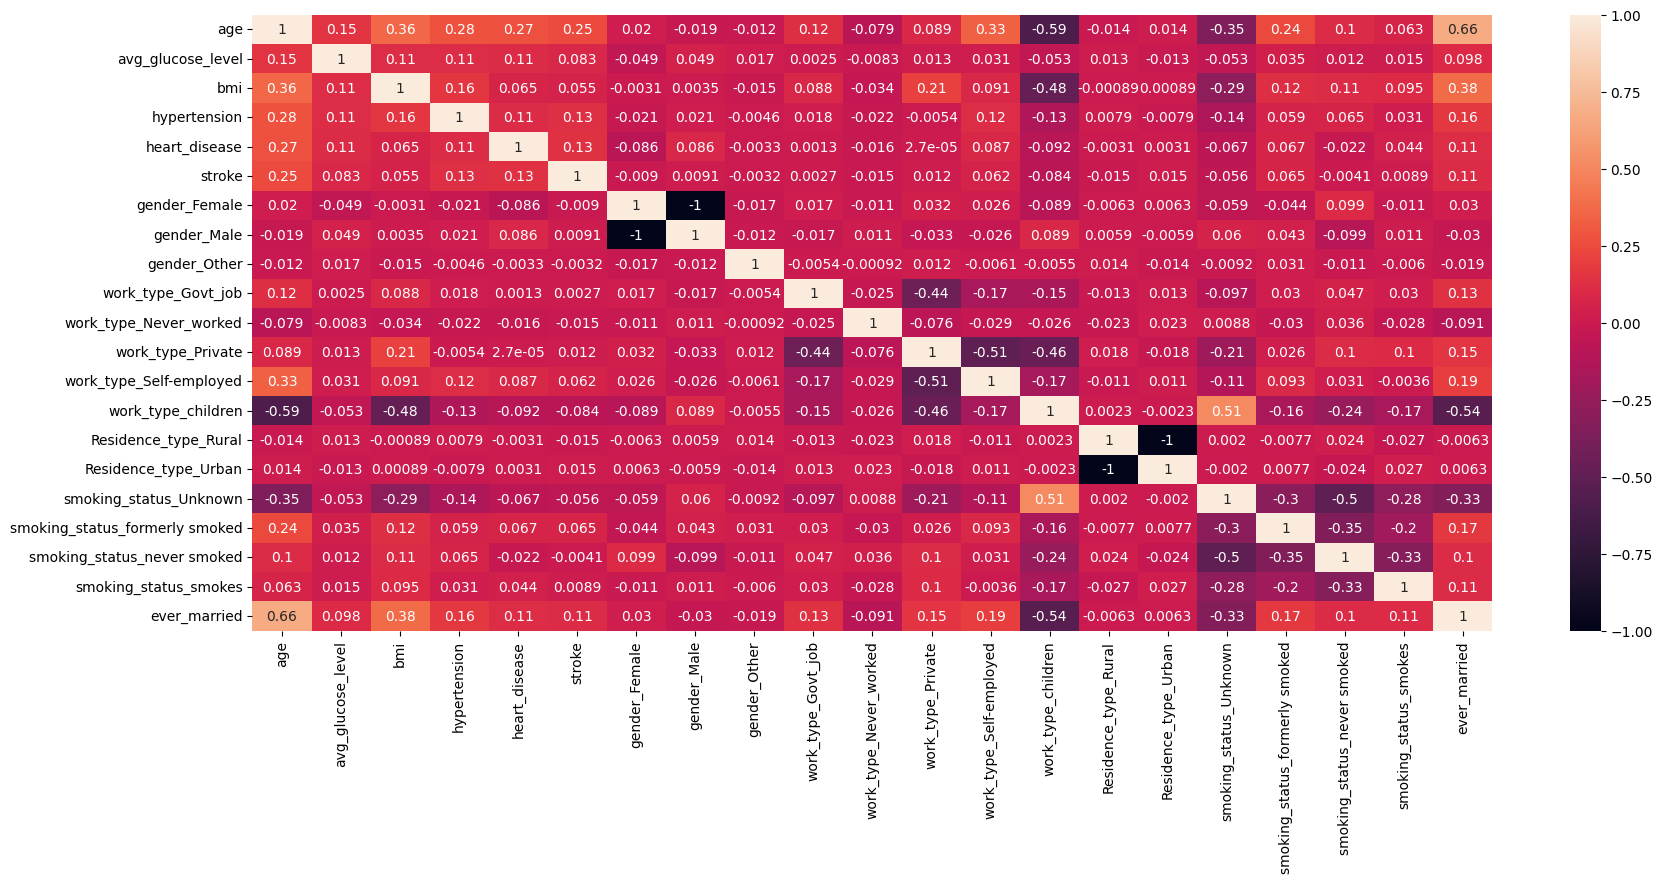

In [ ]:
corr = encoded_type_df.corr(method='spearman')

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)

Segundo a matriz de correlção, identificamos que as colunas age, avg_glucouse_level, hypertension e heart_disease tem uma correlação relevante com a nossa variável target, segundo a matriz de correlação. Portanto, usaremos elas no treinamento do modelo.

Utilizaremos o BMI devido a sua correlação com outras colunas relevantes, como a hypertension e o heart_disease. Conversando com médicos, foi dito também que é uma variável com relevância para predição de AVC.

Temos também as colunas de gender e smoking, que apesar do dataset não ter sido apresentada uma alta correção, segundo as fontes citadas acima são relevantes para casos de AVC, então, manteremos elas também para fazer o treinamento.

Iremos remover o ever_married devido a chegarmos a conclusão de que ela está mais correlacionada com a idade (age) do que a nossa target. Já que quanto mais velha a pessoa, mais chance dela ter se casado. Além disso, não encontramos fontes que corroboram a teoria de que o fato do individuo ser casado influencie na chance de ter AVC. Essa correlação mais alta nessa coluna deve ocorrer devido a idade dos individuos, já que verificamos que as faixas mais altas de idade tem mais chances de ter AVC.

Testamos também a correlação com o método de spearman, porém, não houve mudanças signicativas nos valores comparados.


# Divisão de treino e teste

Vamos agora separar a nossa base em treino e teste. Utilizaremos a divisão de 20% para teste e 80% para treino.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_original[['age','avg_glucose_level', 'hypertension', 'heart_disease', 'smoking_status','gender', 'bmi']]
y = df_original['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Verificar a proporção
import numpy as np

print("Proporção original:", np.bincount(y) / len(y))
print("Treino:", np.bincount(y_train) / len(y_train))
print("Teste:", np.bincount(y_test) / len(y_test))

Proporção original: [0.95127202 0.04872798]
Treino: [0.95132094 0.04867906]
Teste: [0.95107632 0.04892368]


In [ ]:
# Aplicar o pipeline na base de treino e de teste
from sklearn.preprocessing import MinMaxScaler

pipeline_data = ColumnTransformer(transformers=[
    ('scaler', MinMaxScaler(), X.select_dtypes('float64').keys()),
    ('int_imputer', SimpleImputer(), X.select_dtypes('int64').keys()),
    ('encoded', hot_encoder, ['gender', 'smoking_status']),
], verbose_feature_names_out=False)

X_train_encoded = pipeline_data.fit_transform(X_train)
X_test_encoded = pipeline_data.transform(X_test)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=pipeline_data.get_feature_names_out())
X_test_encoded = pd.DataFrame(X_test_encoded, columns=pipeline_data.get_feature_names_out())

X_train_encoded.head()

,age,avg_glucose_level,bmi,hypertension,heart_disease,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.584961,0.065045,0.261168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.182129,0.309898,0.122566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.816895,0.255286,0.167239,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.536133,0.047503,0.166094,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.169922,0.125658,0.243986,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


# Undersampling + Oversampling

Testamos inicialmente com o oversampling porém tivemos métricas não satisfatórias, explicaremos melhor no tópico de análise de resultados. Agora estamos testando com uma técnica usando o uma mescla de oversampling para 500 amostras de stroke (AVC) = 1 e um undersampling de stroke (AVC) = 0 para 500

Utilizamos o RandomUnderSampler para fazer o tratamento, testamos com outros métodos de undersampling, porém este foi o que obtivemos melhor desempenho. Será ilustrado na discussão de resultados.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter

# Create a custom sampling strategy for exactly 500 samples per class
def create_balanced_500_dataset(X_train, y_train):
    """
    Create a balanced dataset with exactly 500 samples for each class
    """

    # Step 1: First undersample the majority class (stroke=0) to 500
    undersampler = RandomUnderSampler(
        sampling_strategy={0: 500},  # Keep only 500 samples of class 0
        random_state=42
    )

    # Step 2: Then oversample the minority class (stroke=1) to 500
    oversampler = SMOTE(
        sampling_strategy={1: 500},  # Create 500 samples of class 1
        random_state=42
    )

    # Create pipeline
    pipeline = ImbPipeline([
        ('undersampler', undersampler),
        ('oversampler', oversampler)
    ])

    # Apply the pipeline
    X_balanced, y_balanced = pipeline.fit_resample(X_train, y_train)

    return X_balanced, y_balanced

# Apply the custom balancing
X_train_os, y_train_os = create_balanced_500_dataset(X_train_encoded, y_train)

# Verify the class distribution
print("Class distribution after balancing to 500 each:")
print(y_train_os.value_counts())
print(f"Total samples: {len(y_train_os)}")

Class distribution after balancing to 500 each:
stroke
0    500
1    500
Name: count, dtype: int64
Total samples: 1000


In [ ]:
X_train_encoded.shape

(4088, 12)

In [ ]:
X_train_os.shape

(1000, 12)

In [ ]:
# Verificar a proporção

print("Treino:", np.bincount(y_train_os) / len(y_train_os))

Treino: [0.5 0.5]


Verificamos que o ovesampling equalizou os dados de ocorrência de AVC e não ocorrência. Agora temos uma proporção de 50% em cada classe.

#Buscando os melhores hyperparametros com o gridSearch

Agora, iremos analisar os melhores hyperparâmetros para cada modelo que pretendemos utilizar para resolver o problema da predição de casos de AVC.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, make_scorer, recall_score, precision_score

def negative_predictive_value(y_true, y_pred):
    """
    Calcula o valor preditivo negativo (NPV)
    NPV = TN / (TN + FN)
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn) if (tn + fn) > 0 else 0

def specificity_predictive_value(y_true, y_pred):
    """
    Calcula a especificidade (SPV)
    SPV = TN / (FP + TN)
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (fp + tn) if (fp + tn) > 0 else 0

# Criar o scorer para usar no GridSearchCV
npv_scorer = make_scorer(negative_predictive_value, greater_is_better=True)
specificity_scorer = make_scorer(specificity_predictive_value, greater_is_better=True)
f1_scorer = make_scorer(f1_score, greater_is_better=True)
roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True)
recall_scorer = make_scorer(recall_score, greater_is_better=True)
precision_scorer = make_scorer(precision_score, greater_is_better=True)

metrics_scoring = {'f1_score': f1_scorer, 'roc_auc_score': roc_auc_scorer, 'recall_score': recall_scorer, 'precision_score': precision_scorer, 'npv_scorer': npv_scorer, 'specificity_scorer': specificity_scorer}

Nossas escolhas de métricas a serem utilizadas foram descritas na live extra com a médica Elena. São métricas que trazem mais confiabilidade ao médico para tomar uma decisão baseada na resposta do modelo.

Além disso, levam bastante em conta os números de falso negativos e falso positivos, que são essencias de serem apresentados aos usuários, para permitir um entendimento melhor de como utilizar o modelo.

Não encontramos métodos prontos para executar os scores preditivo negativo (NPV) e o especificidade (SPV) portanto definimos funções customizadas para estes calculos.

*Print retirado da apresentação da live.*

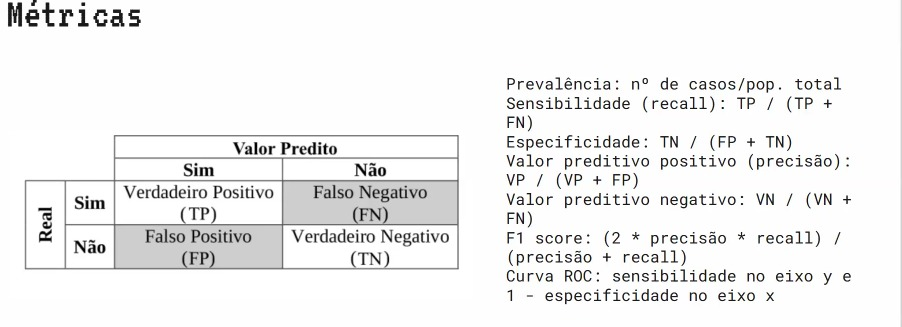

## KNN
Verificação de colunas mais representativas para a definição do range do KNN

In [ ]:
error = [] #armazenar os erros

# Calculating error for K values between 1 and 15
for i in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_os, y_train_os)
    pred_i = knn.predict(X_train_os)
    error.append(np.mean(pred_i != y_train_os))

Text(0, 0.5, 'Mean Error')

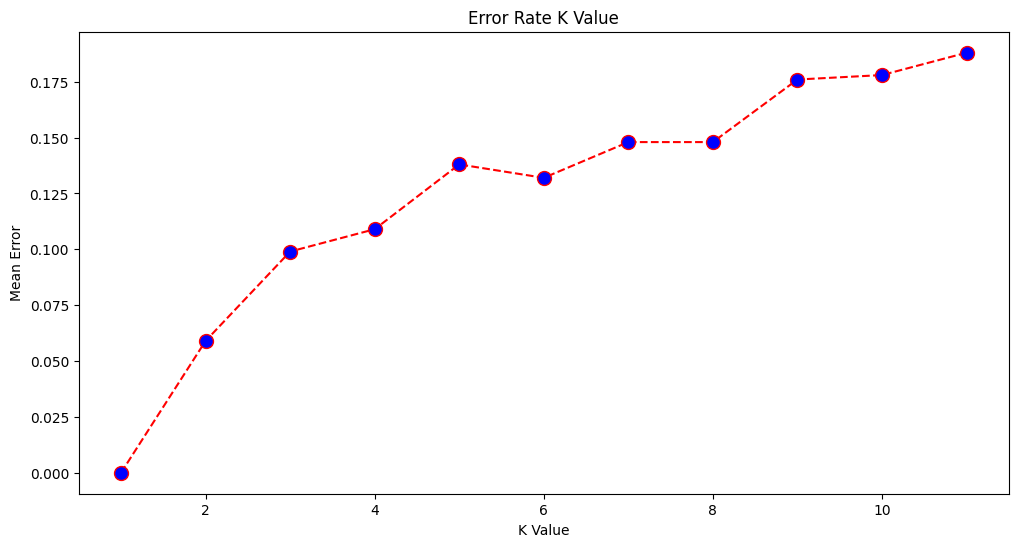

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 12), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Ecolhemos o range de 1 a 2 por serem os valores mais proximos a zero

In [ ]:
knn_param_grid = {'n_neighbors': range(1,2), #total de vizinhos
              'weights': ['uniform', 'distance'], #Função de peso usada na previsão
              'metric':['cosine', 'euclidean', 'manhattan'] #métrica para cálculo da distância
             }

grid_knn = GridSearchCV(KNeighborsClassifier(),
                    param_grid=knn_param_grid,
                    scoring=metrics_scoring,
                    cv=5, n_jobs=4, refit='f1_score'
                    )

grid_knn.fit(X_train_os, y_train_os) #Selecionando os melhores hiperparametros com base nos dados de treino
knn_params = grid_knn.best_params_
print('KNN', knn_params)

KNN {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


## Random Forest
Analise de qual seriam os melhores hyperparâmetros para o modelo

In [ ]:
random_forest_params = {
    'n_estimators': range(1,15),
    'max_depth': range(1,20),
    'criterion': ['gini', 'entropy', 'log_loss'],
}

grid_forest = GridSearchCV(RandomForestClassifier(),
                    param_grid=random_forest_params,
                    scoring=metrics_scoring,
                    cv=5, n_jobs=4, refit='f1_score'
                    )

grid_forest.fit(X_train_os, y_train_os) #Selecionando os melhores hiperparametros com base nos dados de treino
random_forest_params = grid_forest.best_params_
print('RANDOM FOREST', random_forest_params)

RANDOM FOREST {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 12}


## SVM

In [ ]:
svm_params = {
    'C': range(1,4),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': range(1,3),
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(),
                    param_grid=svm_params,
                    scoring=metrics_scoring,
                    cv=5, n_jobs=4, refit='f1_score'
                    )

grid_svm.fit(X_train_os, y_train_os) #Selecionando os melhores hiperparametros com base nos dados de treino
svm_params = grid_svm.best_params_
print('SVM', svm_params)

SVM {'C': 2, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier_params = {
    'n_estimators': [50,100,150],
    'learning_rate': range(1,10),
    'random_state': [42]
}

grid_ada_boost_classifier = GridSearchCV(AdaBoostClassifier(),
                    param_grid=ada_boost_classifier_params,
                    scoring=metrics_scoring,
                    cv=5, n_jobs=4, refit='f1_score'
                    )

grid_ada_boost_classifier.fit(X_train_os, y_train_os) #Selecionando os melhores hiperparametros com base nos dados de treino
ada_boost_classifier_params = grid_ada_boost_classifier.best_params_
print('AdaBoostClassifier', ada_boost_classifier_params)


AdaBoostClassifier {'learning_rate': 3, 'n_estimators': 50, 'random_state': 42}


# Validação do Modelo com K-Fold Cross-Validation

Para garantir uma avaliação robusta e confiável do desempenho dos modelos de Machine Learning, estamos utilizando a técnica de Validação Cruzada K-Fold. Nessa abordagem, o conjunto de dados é dividido em k subconjuntos (ou folds) de forma estratificada e balanceada. Em cada iteração, um dos folds é utilizado como conjunto de validação, enquanto os k-1 folds restantes são usados para treinamento. Esse processo é repetido k vezes, garantindo que cada observação do conjunto de dados seja utilizada tanto para treinamento quanto para validação.

Ao final das iterações, os resultados são agregados (por exemplo, via média das métricas de avaliação), proporcionando uma estimativa mais estável e generalizável da performance do modelo. Essa técnica é especialmente útil para evitar overfitting e reduzir a variabilidade na validação, sendo fundamental na escolha do modelo com melhor desempenho geral.

Utilizaremos o valor 5 subconjuntos para fazer a avaliação, com os melhores hyperparâmetros de cada modelo.

Link: https://scikit-learn.org/stable/modules/cross_validation.html#k-fold

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
def cross_validation_models (x, y):
    random_forest_local = RandomForestClassifier(criterion='gini', max_depth=17, n_estimators=11, random_state=42)
    knn = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')
    svc = SVC(C=2, degree=1, gamma='scale', kernel='rbf', random_state=42)
    ada_boost = AdaBoostClassifier(learning_rate=3, n_estimators=50, random_state=42)

    kfold  = KFold(n_splits=5, shuffle=True, random_state=42) # shuffle=True, Shuffle (embaralhar) os dados.
    result_random_forest = cross_val_score(random_forest_local, x, y, cv = kfold)
    result_knn = cross_val_score(knn, x, y, cv = kfold)
    result_svc = cross_val_score(svc, x, y, cv = kfold)
    result_ada_boost = cross_val_score(ada_boost, x, y, cv = kfold)

    dic_models = {
        "RF": result_random_forest.mean(),
        "KNN": result_knn.mean(),
        "SVC": result_svc.mean(),
        "ADA": result_ada_boost.mean(),
    }
    # Select the best model.
    melhorModelo = max(dic_models, key=dic_models.get)

    print("KNN (R^2): {0}\nSVM (R^2): {1}\nRandom Forest (R^2): {2}\nAda Boost (R^2): {3}".format(result_knn.mean(), result_svc.mean(), result_random_forest.mean(), result_ada_boost.mean()))
    print("O melhor modelo é: {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))


In [ ]:
cross_validation_models(X_train_os, y_train_os)

KNN (R^2): 0.8210000000000001
SVM (R^2): 0.779
Random Forest (R^2): 0.806
Ada Boost (R^2): 0.778
O melhor modelo é: KNN com o valor: 0.8210000000000001


## Criando o pipeline para o treinamento do modelo

Criamos o pipeline para facilitar caso o modelo seja exportado para utilização em produção.

In [ ]:
from sklearn.pipeline import Pipeline

knn_pipeline = Pipeline([
    ('preprocessor', pipeline_data),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform'))
])

## Treinando o modelo

Vamos treinar o modelo, utilizando os dados já tratados pelo pipeline e feitos os tratamentos de undersampling e oversampling

In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')
knn_model.fit(X_train_os, y_train_os)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

# Avaliando o resultado do modelo

In [ ]:
y_pred = knn_model.predict(X_test_encoded)
y_prob = knn_model.predict_proba(X_test_encoded)[:,1]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       972
           1       0.11      0.56      0.18        50

    accuracy                           0.75      1022
   macro avg       0.54      0.66      0.52      1022
weighted avg       0.93      0.75      0.82      1022



Tivemos um valor baixo de f1 score, e com um recall de 56% na classe 1 (caso de AVC) e 76% na 0 (não caso de AVC)

<Figure size 1500x500 with 0 Axes>

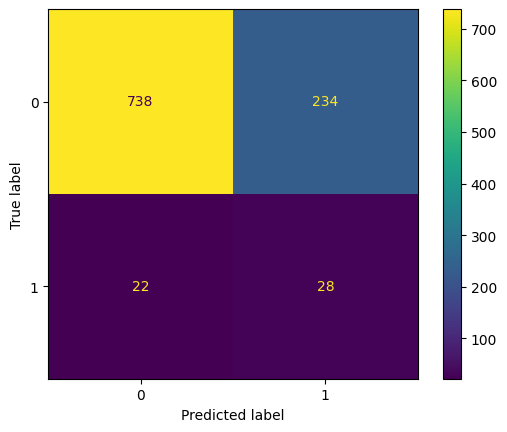

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_pred)

figure = plt.figure(figsize=(15, 5))

disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result)

disp.plot(values_format='d')

Analisando a matriz de confusão, vemos que há uma ocorrência maior de casos de falso positivo do que de falso negativo. Ou seja, ele responde mais que o indivíduo tem ou pode ter AVC do que não ter.

In [ ]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

np.float64(0.6596296296296298)

Text(0.5, 0, 'Falso Positivo')

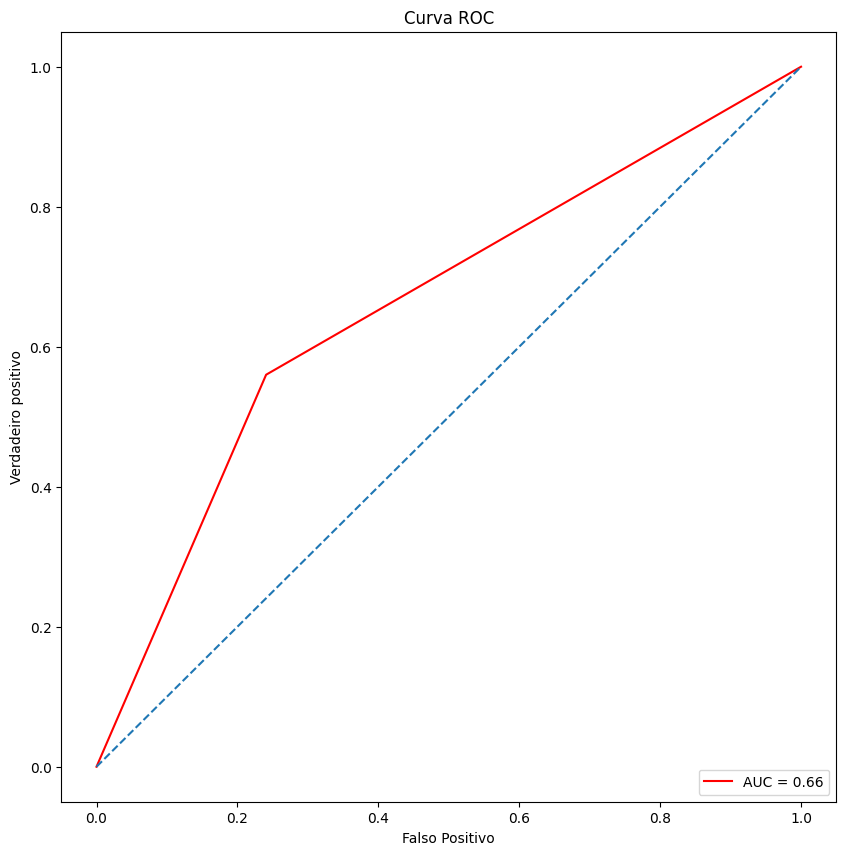

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Curva ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('Verdadeiro positivo')
plt.xlabel('Falso Positivo')

## Análise da resposta do modelo com SHAP

In [ ]:
import shap

explainer = shap.Explainer(knn_model.predict, X_test_encoded)
shap_values = explainer(X_test_encoded)

PermutationExplainer explainer: 1023it [11:40,  1.45it/s]


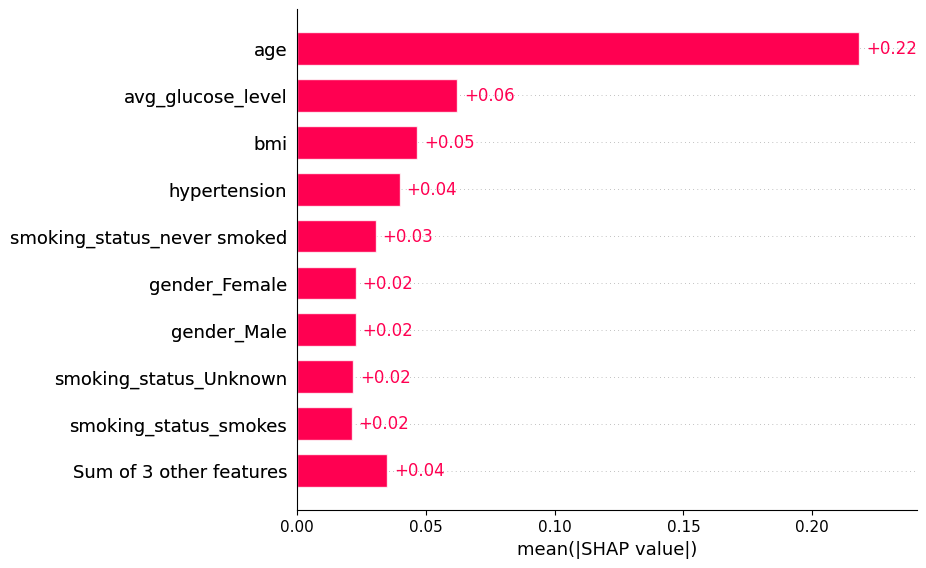

In [ ]:
shap.plots.bar(shap_values)

É possível observar no gráfico de SHAP que algumas das correlações observadas e teses levantadas se mantiveram. No gráfico é indicado que a idade e a média de glicose foram as features com maior importância para a resposta do modelo.

Um ponto a se observar, é que o bmi fico em uma colocação acima do esperado, sendo a terceira maior feature. Corroborando com o relato do médico que conversou com o grupo.

# Comparativo entre os modelos

Durante o desenvolvimento do projeto testamos algumas abordagens para chegar no melhor resultado para a modelagem da solução.

## Oversampling da classe minoritária

Tentamos fazer o oversampling dos casos de ocorrência de AVC utilizando o método de SMOTE, já que temos uma base bem desbalanceada. Utilizando essa abordagem, durante a etapa de cross validation, obtivemos o modelo de random forest como o melhor candidato.

Com o modelo de random foest, tivemos um resultado de precision e f1 score levemente maior do que o atual, porém obtivemos um valor de call bem inferior

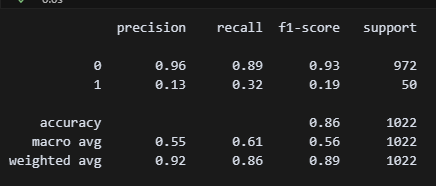

## Oversampling e undersampling com SMOTETomek

Tentamos também utilizar o método de SMOTE e Tomek unidos, para fazer um undersampling e oversampling, para termos uma base de dados mais balanceada. Obtivemos o método KNN como o melhor modelo na etapa de validação cruzada.

Por fim, obtivemos um resultado bem parecido com a abordagem de oversampling, já que houve ainda assim uma grande inserção de dados articiais na classe minoritária

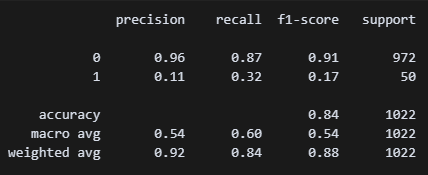

## Oversampling e undersampling utilizando o método de RandomUnderSampler

**Essa abordagem foi a escolhida e demonstrada no notebook do trabalho**

Utilizamos o método de random undersampling para igualar os registros das classes, retirando dados da classe majoritária e deixando somente 500 registros dela. E utilizamos a técnica de SMOTE para fazer o oversampling da classe minoritária para aumentar a sua ocorrência para 500.

Durante a validação cruzada, obtivemos o modelo de KNN como o melhor candidato.

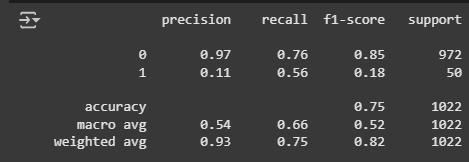

# Conclusão

Segundo os nossos testes e resultados demonstrados acima, escolhemos o modelo de KNN com a técnica de oversampling e undersampling utilizando o randomUnderSampler.

Nessa abordagem perdemos aproximadamente 2% de precision e f1 score comparado com as outras abordagens, porém houve um aumento de 24% na métrica de recall. Já que o recall é uma métrica essencial para casos médicos, optamos por seguir essa linha e mantivemos todo o passo a passo no jupyter.

Apesar da melhora significativa obtida pela abordagem escolhida, não entendemos que seria um modelo viável para ser utilizado por um médico no mundo real. Temos valores médios de f1 score, precisão e recall muito baixos, além de que o modelo tem uma taxa muito mais acertiva para pessoas que não tem a doença, fazendo com que não seja indicado para o objetivo proposto, que seria de identificar pacientes com probabilidade de AVC.



## Pontos de melhora para o resultado do modelo


1.   Enriquecimento de dados
  
  1.1  Incluir variáveis adicionais relevantes para AVC (histórico familiar, nível de atividade física, dieta, percentual de gordura corporal, etc.) para aumentar a capacidade preditiva.
  
  1.2 Aumentar o volume de dados de casos de AVC, para melhorar o balanceamento do dataset e termos mais dados para treinar o modelo.

  1.3 Ter uma base de dados maior, para ter mais casos e deixar o modelo mais robusto



Próximos passos:

1- Definir as variávies para utilizar no modelo - OK

2- Separar em dados de treino e teste - OK

3- Oversampling - OK

4 - Definir os modelos a serem utilizados e usar o searchGrid para encontrar os melhores hyperparametros - OK

5 - Fazer validação cruzada para validar o melhor modelo otimizado - OK

6 - Fazer o treinamento e o predict com o pipeline. Analisar o resultado do modelo (F1 score, curva roc e matriz de confusão) - OK

7 - Fazer o SHAP para explicabilidade do modelo - OK

8 - Fazer a explicação verificando se o modelo está bom para ser utilzado ou não

Colunas: age, avg_glicouse_level, bmi, hypertension, heart_disease, gender e smoking